# The structure adjacent matrix generation script

This script is aiming at convert the input molecular structures from users into an adjacent matrix for the calculation by the software. The input molecular structures from users should be in the form of Simplified Molecular Input Line Entry System (SMILES). Since the linear notation of the SMILES text representation is built from molecular graphs, the essential topological or structural information (i.e., the connectivity, the type of connectivity and the type of atoms) is encoded inside this text representation. The SMILES can be generated from Chemdraw and any other molecule drawing tools.

The packages used to process the SMILES are rdkit and pandas

In [1]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import pandas as pd 

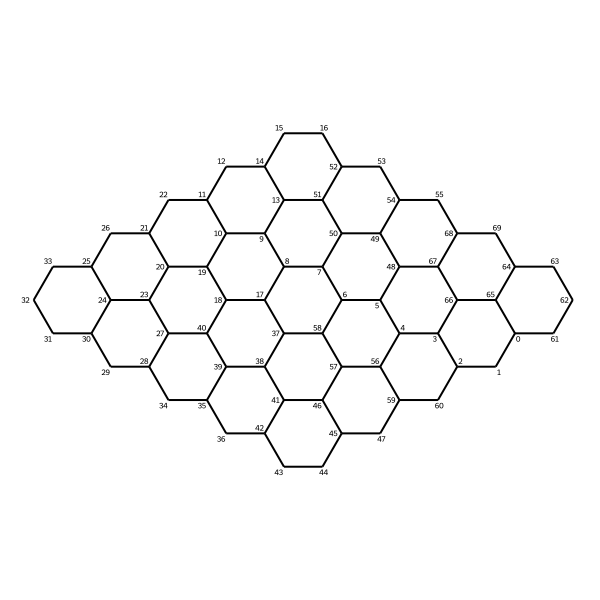

In [4]:
smiles = 'C1(CC2C3C(C(C4C5C(C(C6C7C8)C9C8CC%10)C(C%11C6C(C%12C7)C(C%13C%14C%12)C%15C(CC%13CCC%14)CC%16C%17)C%18C(C%16C%11%15)C%19C%17CCC(C%20%19)C%21)C%22C(C5C9C%10C%23)C%23C%24)C(C%20C4%18)C%21C2)CCCC%25C1C3C%22C%24C%25'
skeleton = Chem.MolFromSmiles(smiles)
Chem.Kekulize(skeleton)
am = Chem.GetAdjacencyMatrix(skeleton)
rdDepictor.Compute2DCoords(skeleton)
d2d = rdMolDraw2D.MolDraw2DSVG(600,600)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(skeleton)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [5]:
pd.DataFrame(am).to_csv("./diamond_sturcture.csv")

The image generated will indicate the users the index of the atoms inside the molecules. This information is important when users try to create the carbon loop and carbon reloop files. The adjacency matrix is saved as diamond_structure.csv in this case. The user can define any different names and the file will be saved in the same directory as this script. The csv file can be converted to xls file easily by 